In [3]:
%matplotlib inline
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/gbromley/Dropbox/code/python_utilities/')
from python_data_functions import extract_months
from matplotlib.offsetbox import AnchoredText
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText

/Users/gbromley/anaconda/envs/paper1_research/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  del sys.path[0]


In [100]:
### data sources ###
data_dir = '/Users/gbromley/data/wrf_output/'
precip_fallow = xr.open_dataset(data_dir+'modland/PRECIP_fallow_mon.nc')
precip_non_fallow =  xr.open_dataset(data_dir+'test/PRECIP_nonfallow_mon.nc')

season = 'MJ'
mj=[5,6]
ext_e = -92
ext_w = -120
ext_n = 55
ext_s = 38

In [60]:
precip_fallow_test = ((precip_fallow['RAINC']+ precip_fallow['I_RAINC']*1000.0)+(precip_fallow['RAINNC']+precip_fallow['I_RAINNC']*1000.0))

precip_non_fallow_test = ((precip_non_fallow['RAINC']+ precip_non_fallow['I_RAINC']*1000.0)+(precip_non_fallow['RAINNC']+precip_non_fallow['I_RAINNC']*1000.0))

In [110]:
diff = np.empty(shape=(12,174,224))

In [111]:
months = [1,2,3,4,5,6,7,8,9,10,11]
diff[0] = (precip_non_fallow_test.isel(XTIME=0))/(precip_fallow_test.isel(XTIME=0))
for month in months:
        diff[month] =  (precip_non_fallow_test.isel(XTIME=month) - precip_non_fallow_test.isel(XTIME=(month-1)))/(precip_fallow_test.isel(XTIME=month) - precip_fallow_test.isel(XTIME=(month-1)))


In [133]:
test = precip_fallow_test.copy(deep=True)
test.values = diff

In [135]:
diff_mj = test.sel(XTIME=extract_months(test['XTIME.month'], months[0],months[-1])).mean(dim='XTIME')

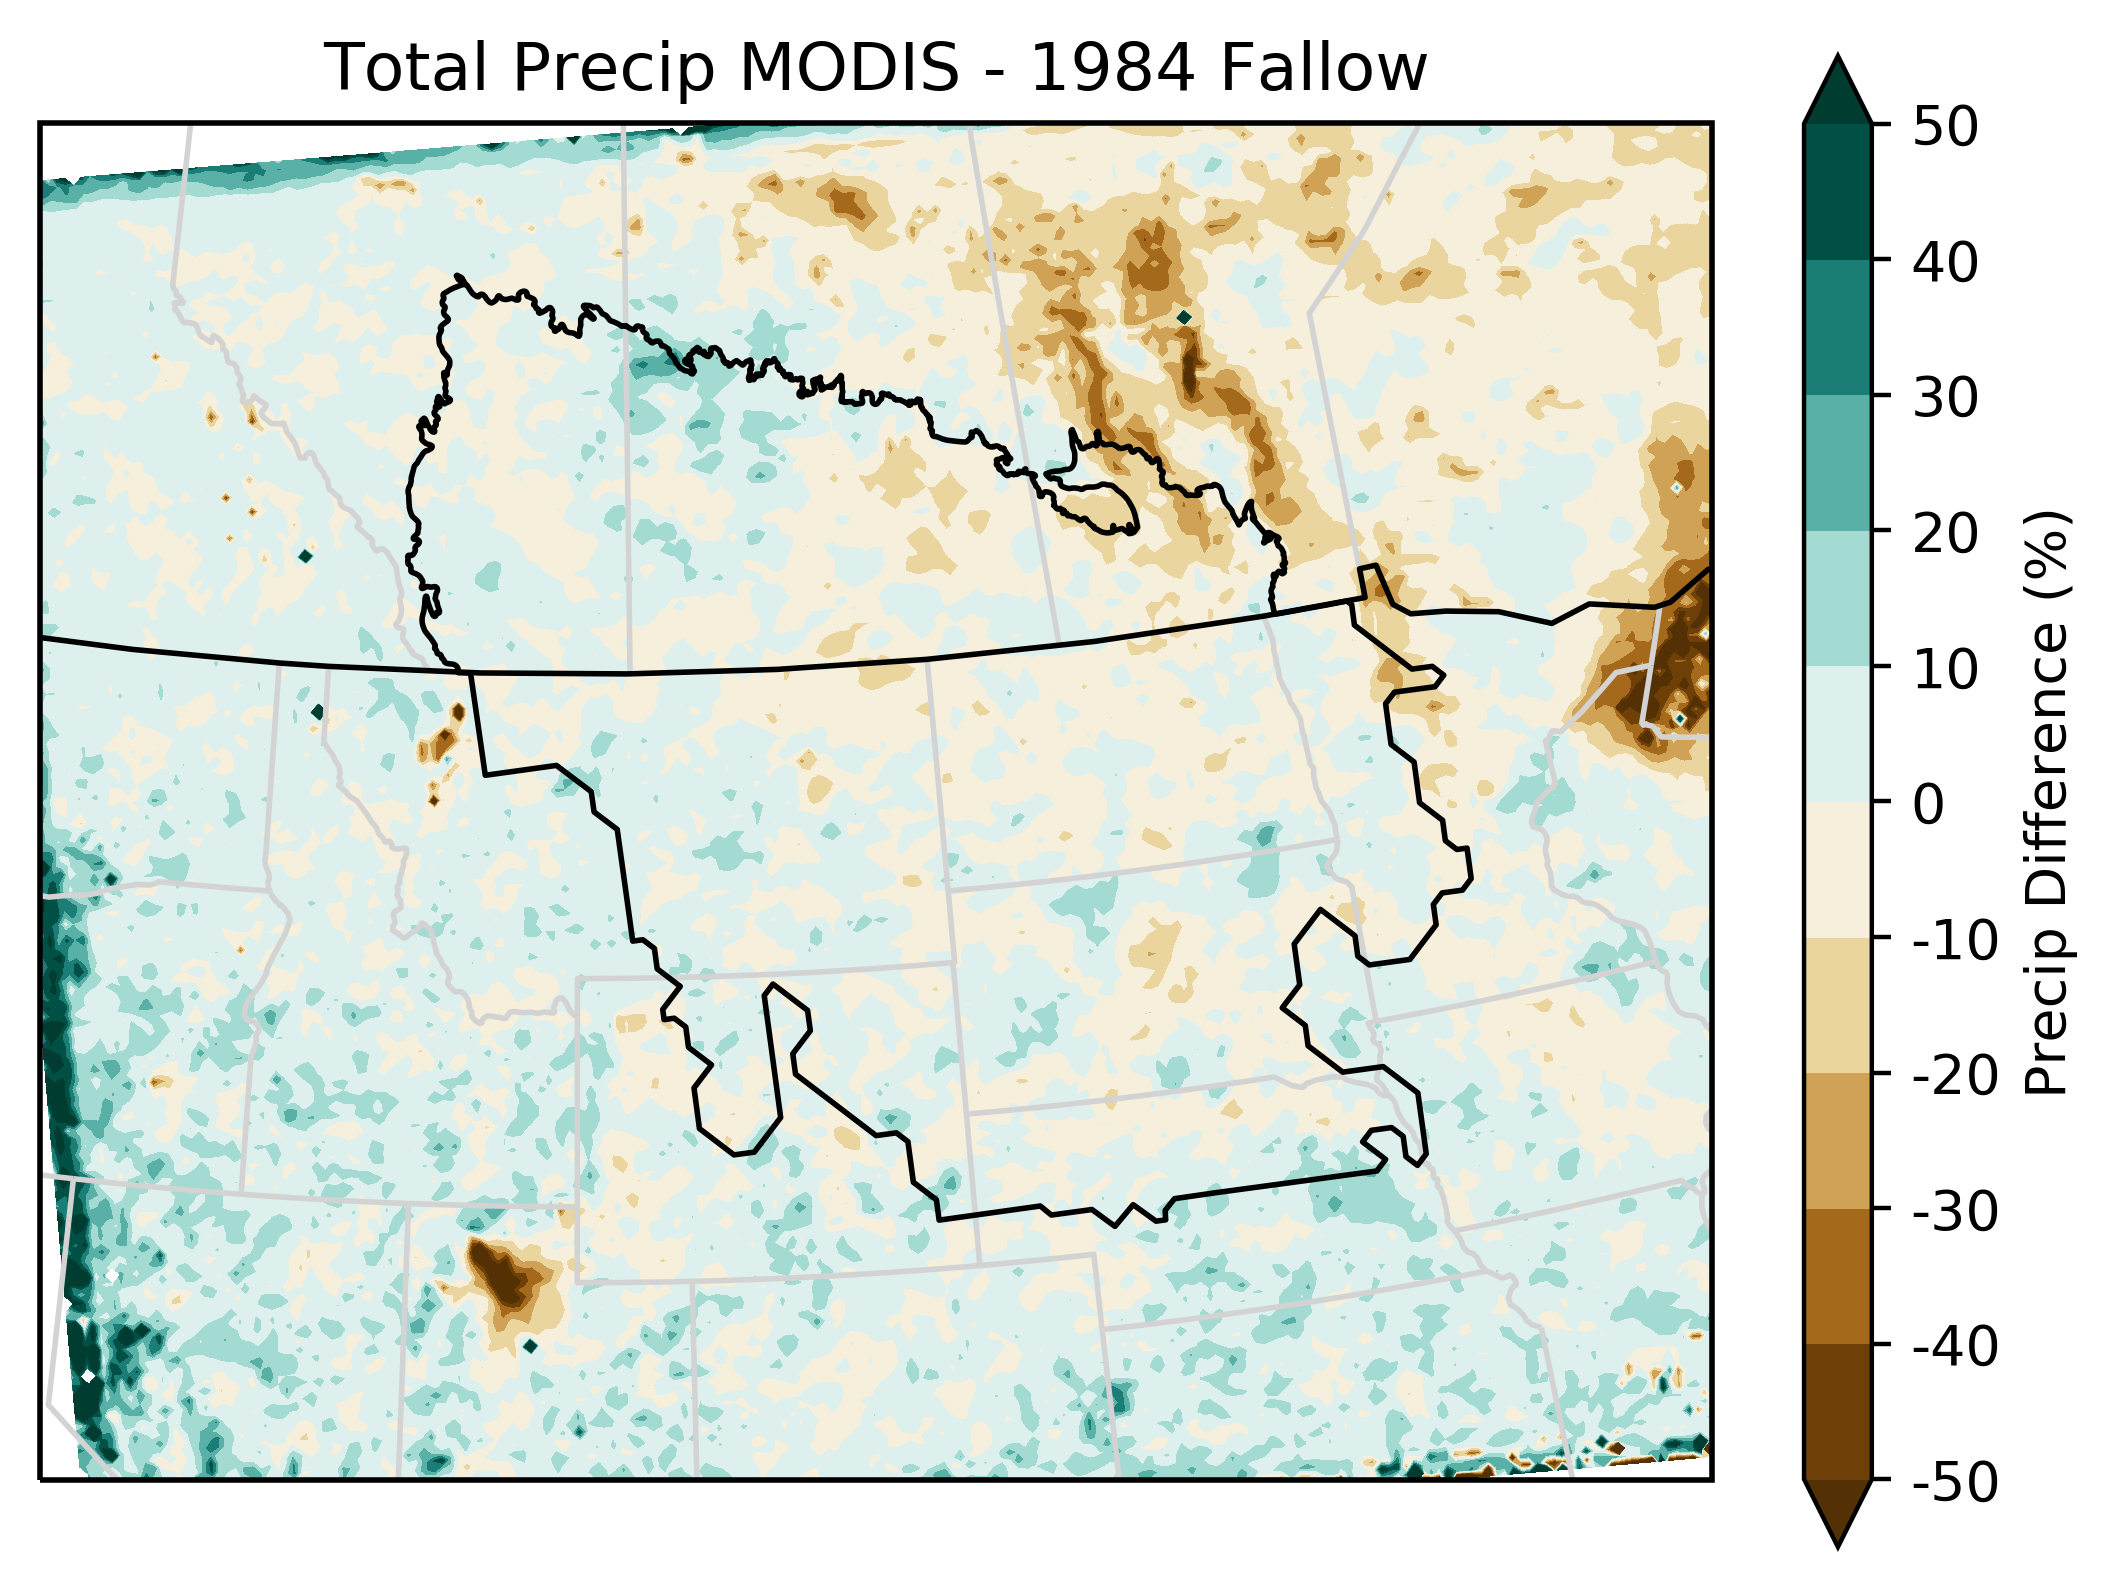

In [137]:

levs = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5]

fig = plt.figure(1,figsize=(13,7), dpi=400.0)
projection = ccrs.AlbersEqualArea(central_longitude=-111.0,central_latitude=47.0,false_easting=0.0, false_northing=0.0, standard_parallels=(40.0, 50.0), globe=None)
ax1 = plt.subplot(1,2,1, projection = projection)

plot = plt.contourf(diff_mj.XLONG,diff_mj.XLAT,diff_mj[:,:].values,transform=ccrs.PlateCarree(),levels=levs ,cmap='BrBG', extend='both')




ax1.set_extent([ext_e, ext_w, ext_s, ext_n])
states_provinces = cfeature.NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax1.add_feature(states_provinces, edgecolor='lightgray')
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS)
shape_feature = ShapelyFeature(Reader('/Users/gbromley/Dropbox/Montana_Climate_Project/Study_Area/NGP_Study_Area/Study_Area_08_01_17.shp').geometries(),crs=ccrs.PlateCarree(), facecolor='none',edgecolor='black')
ax1.add_feature(shape_feature)
#anchored_text = AnchoredText("b", loc=2)
#ax1.add_artist(anchored_text)

#ax1.title.set_visible(False)
ax1.set_title('Total Precip MODIS - 1984 Fallow')
cb = plt.colorbar(plot, cmap='BrBG',fraction=0.037, ticks=[0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5])
cb.ax.set_yticklabels(['-50','-40','-30','-20','-10','0','10','20','30','40','50'])
cb.set_label(r'Precip Difference (%)',fontsize=10)


In [ ]:
months = [0,1,2,3,4,5,6,7,8,9,10,11]
for month in months:
    DIFF[month] = WRF.isel(XTIME=month) - CRU.isel(time=month)
